# Assignment 8 Federated Learning

Name: Sohila Mohamed

# CIFAR-10 (60000)

## Question 1
Load the CIFAR-10 dataset from PyTorch into dataloaders using a batch size of 16

Use PyTorch transforms to convert to tensor and normalize images to be in range [-1,1]

The CIFAR-10 dataset contains 60,000 colour images, each with dimensions 32x32px. The content of the images within the dataset is sampled from 10 classes.

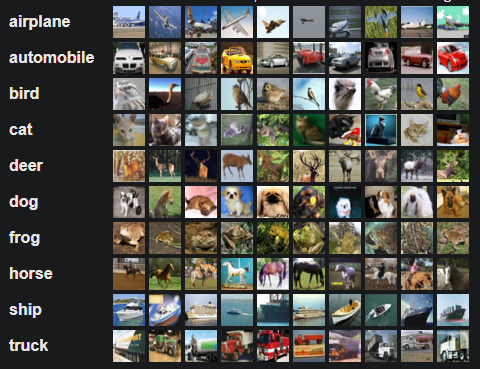

In [ ]:
import numpy as np 
import pandas as pd
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch import nn
import matplotlib.pyplot as plt
import torch.optim as optim

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True,transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=16,
                                         shuffle=False, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified


## Question 2
Display **any** 10 images from the dataset in **one plot**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


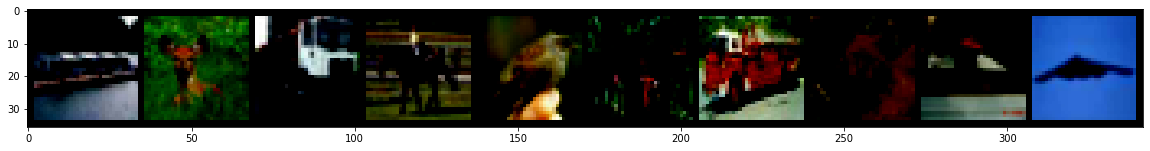

In [ ]:
def show(img):
    plt.rcParams["figure.figsize"]=(20,20)
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.show()

dataloader_iterator = iter(trainloader)
X, Y = next(dataloader_iterator)
images=X[0:10]
grid=torchvision.utils.make_grid(images,nrow=10)
show(grid)

## Question 3



### 3.1
Build the following neural net architecture using **PyTorch**:
- Conv2D with input channels 3 and output channels 32, kernel 3 and padding 1
- ReLU activation
- Conv2D with output channels 64, kernel 3, stride 1 and padding 1
- ReLU activation
- Max pooling kernel (2,2)
- Batch Norm

- Conv2D with output channels 128, kernel 3, stride 1 and padding 1
- ReLU activation
- Conv2D with output channels 128, kernel 3, stride 1 and padding 1
- ReLU activation
- Max pooling kernel (2,2)
- Batch Norm

- Conv2D with output channels 256, kernel 3, stride 1 and padding 1
- ReLU activation
- Conv2D with output channels 256, kernel 3, stride 1 and padding 1
- ReLU activation
- Max pooling kernel (2,2)
- Batch Norm 

- Flatten
- Linear layer: input 256x4x4, output 1024
- ReLU activation
- Linear layer: output 512
- ReLU activation
- Linear layer

In [ ]:
class Cifar10CnnModel(nn.Module):
    def __init__(self):
        super(Cifar10CnnModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=128,out_channels=128,kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3, stride=1, padding=1)
        self.conv6 = nn.Conv2d(in_channels=256,out_channels=256,kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1= nn.Linear(256*4*4,1024)
        self.fc2= nn.Linear(1024,512)
        self.fc3= nn.Linear(512,10)
        self.batchnorm1=nn.BatchNorm2d(64)
        self.batchnorm2=nn.BatchNorm2d(128)
        self.batchnorm3=nn.BatchNorm2d(256)
        
    def forward(self, xb):
      l1=F.relu(self.conv1(xb))
      l2=self.pool(F.relu(self.conv2(l1)))
      l3=self.batchnorm1(l2)
      l4=F.relu(self.conv3(l3))
      l5=self.pool(F.relu(self.conv4(l4)))
      l6=self.batchnorm2(l5)
      l7=F.relu(self.conv5(l6))
      l8=self.pool(F.relu(self.conv6(l7)))
      l9=self.batchnorm3(l8)
      l10=x =l9.view(-1, 256*4*4)
      l11=F.relu(self.fc1(l10))
      l12=F.relu(self.fc2(l11))
      l13=self.fc3(l12)

      return l13

### 3.2
Use cross entropy loss and adam optimizer with learning rate 0.0005



In [ ]:
model = Cifar10CnnModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

In [ ]:
print(model)                         # what does the object tell us about itself?
input = torch.rand(1, 3, 32, 32)   # stand-in for a 32x32 color image
print('\nImage batch shape:')
print(input.shape)
output = model(input)                # we don't call forward() directly
print('\nRaw output:')
print(output)
print(output.shape)

Cifar10CnnModel(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (batchnorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm2d(256, eps=1e-05, momen

## Question 4
Train the network as we did in the tutorial for centralized learning

In [ ]:
def train(net, trainloader, criterion, optimizer, epochs: int, verbose=False):
    """Train the network on the training set."""
    net.train()
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()

def test(net, testloader):
  correct = 0
  total = 0
  loss= 0.0
  net.eval()
  with torch.no_grad():
    for data in testloader:
      images, labels = data
      outputs = net(images)
      loss += F.nll_loss(outputs, labels).item()
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  loss /= len(testloader.dataset)
  accuracy = correct / total
    
  return loss, accuracy


In [ ]:
for epoch in range(10):
    train(model, trainloader, criterion, optimizer, 1, True)
    loss, accuracy = test(model, testloader)
    print(f"Epoch {epoch}: validation loss {loss}, accuracy {accuracy}")

## Question 5
Federated learning

1. Build using syft a federated learning pipeline using **10** users/devices

2. Train a Cifar10CnnModel on the federated dataset

In [ ]:
import numpy as np 
import pandas as pd
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch import nn
import matplotlib.pyplot as plt
import torch.optim as optim

In [ ]:

!pip install syft==0.2.3
import syft as sy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
class Arguments():
    def __init__(self):
        self.images = 60000
        self.clients = 10
        self.rounds = 5
        self.epochs = 5
        self.local_batches = 16
        self.lr = 0.01
        self.C = 0.9
        self.drop_rate = 0.1
        self.torch_seed = 0
        self.log_interval = 10
        self.iid = 'iid'
        self.split_size = int(self.images / self.clients)
        self.samples = self.split_size / self.images 
        self.use_cuda = False
        self.save_model = False

args = Arguments()

In [ ]:
hook = sy.TorchHook(torch)
clients = []
for i in range(1,11):
  clients.append(sy.VirtualWorker(hook, id=str(i)))

In [ ]:
clients

[<VirtualWorker id:1 #objects:0>,
 <VirtualWorker id:2 #objects:0>,
 <VirtualWorker id:3 #objects:0>,
 <VirtualWorker id:4 #objects:0>,
 <VirtualWorker id:5 #objects:0>,
 <VirtualWorker id:6 #objects:0>,
 <VirtualWorker id:7 #objects:0>,
 <VirtualWorker id:8 #objects:0>,
 <VirtualWorker id:9 #objects:0>,
 <VirtualWorker id:10 #objects:0>]

In [ ]:
federated_train_loader = sy.FederatedDataLoader(
    torchvision.datasets.CIFAR10('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor()])).federate((clients)),batch_size=args.local_batches, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True,transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=args.local_batches,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
def train(args, model, train_loader, optimizer, criterion,epoch):
   model.train()
   for batch_idx, (data, target) in enumerate(federated_train_loader): 
        model.send(data.location)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        model.get() 
        if batch_idx % args.log_interval == 0:
            loss = loss.get()
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * args.local_batches, len(train_loader) * args.local_batches, 
                100. * batch_idx / len(train_loader), loss.item()))
    

In [ ]:
net = Cifar10CnnModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=args.lr)
epoch_loss=[]
for epoch in range(5):
    train(args, net, federated_train_loader, optimizer, criterion, 1)
    loss, accuracy = test(net, testloader)
    print(f"Epoch {epoch+1}: validation loss {loss}, accuracy {accuracy}")
    epoch_loss.append(loss)

## Question 6
Plot the loss vs epochs

In [ ]:
plt.plot(epoch_loss)
plt.show()